In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn 
import seaborn as sns

In [15]:
cwc = pd.read_csv('CWCrecords.csv')

In [16]:
cwc.head()

,Index,venue,team1,score1,team2,score2,result,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11
0,1,"1st Match, Lord's, June 07, 1975, Prudential W...",England,334/4,India,132/3,England won by 202 runs,NaN,NaN,NaN,NaN,NaN
1,2,"2nd Match, Birmingham, June 07, 1975, Prudenti...",New Zealand,309/5,East Africa,128/8,New Zealand won by 181 runs,NaN,NaN,NaN,NaN,NaN
2,3,"3rd Match, Leeds, June 07, 1975, Prudential Wo...",Australia,278/7,Pakistan,205,Australia won by 73 runs,NaN,NaN,NaN,NaN,NaN
3,4,"4th Match, Manchester, June 07, 1975, Prudenti...",Sri Lanka,86,West Indies,87/1,West Indies won by 9 wickets (with 236 balls r...,NaN,NaN,NaN,NaN,NaN
4,5,"5th Match, Nottingham, June 11, 1975, Prudenti...",England,266/6,New Zealand,186,England won by 80 runs,NaN,NaN,NaN,NaN,NaN


In [17]:
# List of columns to delete
columns_to_delete = ['Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9', 'Unnamed: 10','Unnamed: 11']

# Deleting the specified columns
cwc = cwc.drop(columns=columns_to_delete)

In [22]:
cwc.head()

,Index,venue,team1,score1,team2,score2,result
0,1,"1st Match, Lord's, June 07, 1975, Prudential W...",England,334/4,India,132/3,England won by 202 runs
1,2,"2nd Match, Birmingham, June 07, 1975, Prudenti...",New Zealand,309/5,East Africa,128/8,New Zealand won by 181 runs
2,3,"3rd Match, Leeds, June 07, 1975, Prudential Wo...",Australia,278/7,Pakistan,205,Australia won by 73 runs
3,4,"4th Match, Manchester, June 07, 1975, Prudenti...",Sri Lanka,86,West Indies,87/1,West Indies won by 9 wickets (with 236 balls r...
4,5,"5th Match, Nottingham, June 11, 1975, Prudenti...",England,266/6,New Zealand,186,England won by 80 runs


In [23]:
cwc = cwc.drop(columns=['Index'])

In [24]:
cwc.head()

,venue,team1,score1,team2,score2,result
0,"1st Match, Lord's, June 07, 1975, Prudential W...",England,334/4,India,132/3,England won by 202 runs
1,"2nd Match, Birmingham, June 07, 1975, Prudenti...",New Zealand,309/5,East Africa,128/8,New Zealand won by 181 runs
2,"3rd Match, Leeds, June 07, 1975, Prudential Wo...",Australia,278/7,Pakistan,205,Australia won by 73 runs
3,"4th Match, Manchester, June 07, 1975, Prudenti...",Sri Lanka,86,West Indies,87/1,West Indies won by 9 wickets (with 236 balls r...
4,"5th Match, Nottingham, June 11, 1975, Prudenti...",England,266/6,New Zealand,186,England won by 80 runs


In [25]:
cwc.isnull().sum()

venue      0
team1      0
score1     9
team2      0
score2    14
result     0
dtype: int64

In [27]:
print(cwc['venue'].head())

0    1st Match, Lord's, June 07, 1975, Prudential W...
1    2nd Match, Birmingham, June 07, 1975, Prudenti...
2    3rd Match, Leeds, June 07, 1975, Prudential Wo...
3    4th Match, Manchester, June 07, 1975, Prudenti...
4    5th Match, Nottingham, June 11, 1975, Prudenti...
Name: venue, dtype: object


In [28]:
# change the column name of 'venue' in 'cwc' DataFrame
cwc = cwc.rename(columns={'venue': 'Year'})

In [29]:
cwc = cwc.rename(columns={'team1': 'bat_first', 'score1': 'score_first', 'team2' : 'bat_second', 'score2': 'score_second' })

In [31]:
cwc.head()

,Year,bat_first,score_first,bat_second,score_second,result
0,"1st Match, Lord's, June 07, 1975, Prudential W...",England,334/4,India,132/3,England won by 202 runs
1,"2nd Match, Birmingham, June 07, 1975, Prudenti...",New Zealand,309/5,East Africa,128/8,New Zealand won by 181 runs
2,"3rd Match, Leeds, June 07, 1975, Prudential Wo...",Australia,278/7,Pakistan,205,Australia won by 73 runs
3,"4th Match, Manchester, June 07, 1975, Prudenti...",Sri Lanka,86,West Indies,87/1,West Indies won by 9 wickets (with 236 balls r...
4,"5th Match, Nottingham, June 11, 1975, Prudenti...",England,266/6,New Zealand,186,England won by 80 runs


In [32]:
cwc['Year'] = cwc['Year'].str.extract(r'(\b\d{4}\b)')

In [33]:
cwc['Year'].head()

0    1975
1    1975
2    1975
3    1975
4    1975
Name: Year, dtype: object

In [34]:
cwc['bat_first'].head()

0        England
1    New Zealand
2      Australia
3      Sri Lanka
4        England
Name: bat_first, dtype: object

In [35]:
cwc['bat_first'].describe()

count           454
unique           19
top       Australia
freq             58
Name: bat_first, dtype: object

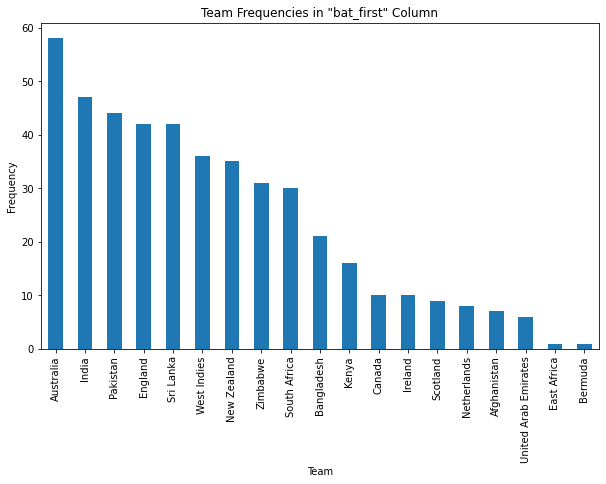

In [37]:
team_counts = cwc['bat_first'].value_counts()

# Creating a bar chart to see how many times each teams are there in the column
plt.figure(figsize=(10, 6))
team_counts.plot(kind='bar')
plt.title('Team Frequencies in "bat_first" Column')
plt.xlabel('Team')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.show()

In [42]:
# Replace values in the 'bat_first' column
cwc['bat_first'].replace({
    'South Africa': 'SA',
    'United Arab Emirates': 'UAE',
    'West Indies': 'WI',
    'New Zealand': 'NZ',
    'Sri Lanka' : 'SL'
}, inplace=True)

In [43]:
cwc['bat_first'].unique()

array(['England', 'NZ', 'Australia', 'SL', 'East Africa', 'Pakistan',
       'India', 'WI', 'Canada', 'Zimbabwe', 'SA', 'Kenya', 'UAE',
       'Netherlands', 'Scotland', 'Bangladesh', 'Ireland', 'Bermuda',
       'Afghanistan'], dtype=object)

In [44]:
# taking the first three letters
cwc['bat_first'] = cwc['bat_first'].apply(lambda x: x[:3] if len(x) > 2 else x)

In [45]:
cwc['bat_first'].unique()

array(['Eng', 'NZ', 'Aus', 'SL', 'Eas', 'Pak', 'Ind', 'WI', 'Can', 'Zim',
       'SA', 'Ken', 'UAE', 'Net', 'Sco', 'Ban', 'Ire', 'Ber', 'Afg'],
      dtype=object)

In [46]:
# Replace values in the 'bat_second' column
cwc['bat_second'].replace({
    'South Africa': 'SA',
    'United Arab Emirates': 'UAE',
    'West Indies': 'WI',
    'New Zealand': 'NZ',
    'Sri Lanka' : 'SL'
}, inplace=True)

In [47]:
cwc['bat_second'].unique()

array(['India', 'East Africa', 'Pakistan', 'WI', 'NZ', 'SL', 'Australia',
       'England', 'Zimbabwe', 'SA', 'UAE', 'Netherlands', 'Kenya',
       'Scotland', 'Namibia', 'Bangladesh', 'Canada', 'Bermuda',
       'Ireland', 'Afghanistan'], dtype=object)

In [49]:
# taking the first three letters
cwc['bat_second'] = cwc['bat_second'].apply(lambda x: x[:3] if len(x) > 2 else x)

In [50]:
cwc['bat_second'].unique()

array(['Ind', 'Eas', 'Pak', 'WI', 'NZ', 'SL', 'Aus', 'Eng', 'Zim', 'SA',
       'UAE', 'Net', 'Ken', 'Sco', 'Nam', 'Ban', 'Can', 'Ber', 'Ire',
       'Afg'], dtype=object)

In [51]:
cwc['bat_first'] = cwc['bat_first'].str.upper()
cwc['bat_second'] = cwc['bat_second'].str.upper()

In [52]:
cwc.head()

,Year,bat_first,score_first,bat_second,score_second,result
0,1975,ENG,334/4,IND,132/3,England won by 202 runs
1,1975,NZ,309/5,EAS,128/8,New Zealand won by 181 runs
2,1975,AUS,278/7,PAK,205,Australia won by 73 runs
3,1975,SL,86,WI,87/1,West Indies won by 9 wickets (with 236 balls r...
4,1975,ENG,266/6,NZ,186,England won by 80 runs


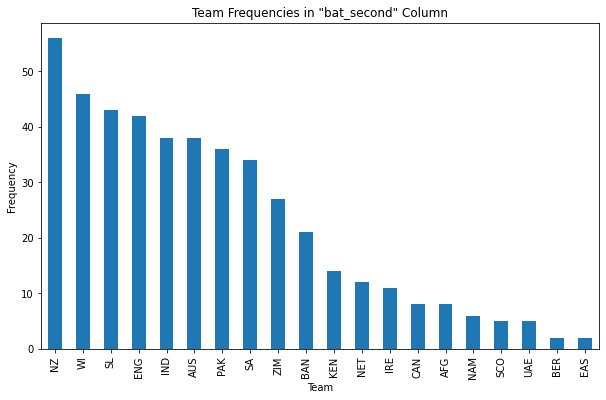

In [53]:
team_counts = cwc['bat_second'].value_counts()

# Creating a bar chart to see how many times each teams are there in the column
plt.figure(figsize=(10, 6))
team_counts.plot(kind='bar')
plt.title('Team Frequencies in "bat_second" Column')
plt.xlabel('Team')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.show()

In [54]:
print(cwc['score_first'].describe())
print(cwc['score_second'].describe())

count     445
unique    381
top       136
freq        4
Name: score_first, dtype: object
count     440
unique    361
top       221
freq        6
Name: score_second, dtype: object


In [55]:
# To see the unique values
unique_values = cwc['score_first'].unique()
print("Unique values in the 'score_first' column:")
print(unique_values)

# To check for missing values
missing_values = cwc['score_first'].isnull().sum()
print(f"Number of missing values in the 'score_first' column: {missing_values}")

Unique values in the 'score_first' column:
['334/4' '309/5' '278/7' '86' '266/6' '120' '328/5' '266/7' '192' '330/6'
 '290/5' '230' '93' '158' '291/8' '190' '189' '159/9' '139/9' nan '182'
 '286/7' '45' '165/9' '238/5' '244/7' '105' '221/8' '293/6' '286/9'
 '322/6' '338/5' '239/6' '262/8' '333/9' '238/9' '252/9' '155' '320/9'
 '217/7' '193/8' '206' '234' '282/9' '235/7' '272/7' '232/8' '181' '273/6'
 '266/8' '136' '261/3' '247' '171' '213' '184/8' '183' '267/6' '270/6'
 '243/7' '242/7' '239/7' '235/9' '360/4' '252/7' '216' '135' '296/4'
 '199/4' '244/9' '236/8' '289/6' '227/5' '297/7' '269/5' '191/7' '251/8'
 '266/5' '218/7' '258/7' '221/9' '267/8' '254/6' '253/5' '248/6' '236/9'
 '312/4' '220/2' '206/9' '170/9' '254/4' '157' '1/0' '190/7' '264/8'
 '237/9' '74' '195' '162/3' '216/7' '200/8' '203/7' '189/9' '211/7'
 '280/6' '197' '163' '220/9' '230/6' '236/4' '268/8' '265/6' '180/6'
 '212/6' '166' '134' '216/6' '262/7' '252/6' '249/6' '321/2' '151/9'
 '307/8' '199/6' '177/9' '228/6' '17

In [56]:
# To see the unique values
unique_values = cwc['score_second'].unique()
print("Unique values in the 'score_second' column:")
print(unique_values)

# To check for missing values
missing_values = cwc['score_second'].isnull().sum()
print(f"Number of missing values in the 'score_second' column: {missing_values}")

Unique values in the 'score_second' column:
['132/3' '128/8' '205' '87/1' '186' '123/0' '276/4' '267/9' '195/3' '138'
 '94' '233/6' '94/6' '159/5' '274' '194/1' '190/1' '160/4' '140/2' nan
 '183/2' '197' '46/2' '151' '191' '212/9' '106/3' '250' '194' '216'
 '288/9' '226/7' '228' '286' '157/5' '158' '218/2' '199/2' '209/5' '238/8'
 '224' '240' '233/3' '184/7' '276/3' '235' '137/1' '129' '172/0' '217/4'
 '188/2' '140' '252' '269' '246/8' '239' '221' '139' '169/4' '236/8'
 '217/9' '136/2' '158/8' '196/9' '247/3' '211/8' '233' '228/6' '184/8'
 '194/3' '234' '196/6' '219/2' '230/9' '224/1' '249' '219' '211' '227'
 '313/7' '221/0' '210/4' '171/1' '201/7' '191/3' '189/7' '24-Jan' '198/7'
 '105/7' '173' '136' '173/2' '104/1' '190/3' '206/5' '173/8' '174' '195/5'
 '164/3' '172' '231/6' '177/9' '137' '201/3' '181/4' '216/6' '167/3' '125'
 '159' '264/6' '232/6' '228/9' '152/8' '155/4' '188/7' '203/3' '178/5'
 '229/4' '174/5' '230/6' '207/7' '112/1' '152' '151/2' '137/5' '167/9'
 '242' '93' '243/5

In [57]:
cwc['score_second'].replace({'24-Jan': 0, pd.NA: 0}, inplace=True)

In [58]:
cwc['score_second'].unique()

array(['132/3', '128/8', '205', '87/1', '186', '123/0', '276/4', '267/9',
       '195/3', '138', '94', '233/6', '94/6', '159/5', '274', '194/1',
       '190/1', '160/4', '140/2', 0, '183/2', '197', '46/2', '151', '191',
       '212/9', '106/3', '250', '194', '216', '288/9', '226/7', '228',
       '286', '157/5', '158', '218/2', '199/2', '209/5', '238/8', '224',
       '240', '233/3', '184/7', '276/3', '235', '137/1', '129', '172/0',
       '217/4', '188/2', '140', '252', '269', '246/8', '239', '221',
       '139', '169/4', '236/8', '217/9', '136/2', '158/8', '196/9',
       '247/3', '211/8', '233', '228/6', '184/8', '194/3', '234', '196/6',
       '219/2', '230/9', '224/1', '249', '219', '211', '227', '313/7',
       '221/0', '210/4', '171/1', '201/7', '191/3', '189/7', '198/7',
       '105/7', '173', '136', '173/2', '104/1', '190/3', '206/5', '173/8',
       '174', '195/5', '164/3', '172', '231/6', '177/9', '137', '201/3',
       '181/4', '216/6', '167/3', '125', '159', '264/6', '232/

In [59]:
# removing the '/xx' part
cwc['score_second'] = cwc['score_second'].apply(lambda x: x.split('/')[0] if '/' in x else x)

TypeError: argument of type 'int' is not iterable

In [60]:
cwc['score_second'] = cwc['score_second'].apply(lambda x: x.split('/')[0] if isinstance(x, str) and '/' in x else x)

In [61]:
cwc['score_second'].unique()

array(['132', '128', '205', '87', '186', '123', '276', '267', '195',
       '138', '94', '233', '159', '274', '194', '190', '160', '140', 0,
       '183', '197', '46', '151', '191', '212', '106', '250', '216',
       '288', '226', '228', '286', '157', '158', '218', '199', '209',
       '238', '224', '240', '184', '235', '137', '129', '172', '217',
       '188', '252', '269', '246', '239', '221', '139', '169', '236',
       '136', '196', '247', '211', '234', '219', '230', '249', '227',
       '313', '210', '171', '201', '189', '198', '105', '173', '104',
       '206', '174', '164', '231', '177', '181', '167', '125', '264',
       '232', '152', '155', '203', '178', '229', '207', '112', '242',
       '93', '243', '220', '272', '168', '254', '248', '245', '289',
       '120', '202', '182', '117', '204', '110', '214', '103', '265',
       '163', '153', '70', '185', '111', '161', '180', '259', '213',
       '253', '133', '275', '225', '142', '126', '144', '84', '32', '37',
       '122', '109

In [63]:
cwc['score_second'] = pd.to_numeric(cwc['score_second'], errors='coerce').astype(int)

In [64]:
cwc['score_second'].unique()

array([132, 128, 205,  87, 186, 123, 276, 267, 195, 138,  94, 233, 159,
       274, 194, 190, 160, 140,   0, 183, 197,  46, 151, 191, 212, 106,
       250, 216, 288, 226, 228, 286, 157, 158, 218, 199, 209, 238, 224,
       240, 184, 235, 137, 129, 172, 217, 188, 252, 269, 246, 239, 221,
       139, 169, 236, 136, 196, 247, 211, 234, 219, 230, 249, 227, 313,
       210, 171, 201, 189, 198, 105, 173, 104, 206, 174, 164, 231, 177,
       181, 167, 125, 264, 232, 152, 155, 203, 178, 229, 207, 112, 242,
        93, 243, 220, 272, 168, 254, 248, 245, 289, 120, 202, 182, 117,
       204, 110, 214, 103, 265, 163, 153,  70, 185, 111, 161, 180, 259,
       213, 253, 133, 275, 225, 142, 126, 144,  84,  32,  37, 122, 109,
       134, 130, 156,  45, 222, 208, 223, 135, 150, 179, 187, 131,  78,
       192,  99, 294,  96, 165, 147,  92,  81, 301, 215, 283,  72, 296,
       266, 338, 115, 146, 329, 166,  59, 300, 261, 141, 307, 113, 277,
       162, 279, 312, 322, 326, 260, 290, 101, 176, 241, 193, 29

In [65]:
cwc['score_second'].dtype

dtype('int32')

In [66]:
cwc['score_first'].replace({pd.NA: 0}, inplace=True)

In [67]:
cwc['score_first'] = cwc['score_first'].apply(lambda x: x.split('/')[0] if isinstance(x, str) and '/' in x else x)

In [68]:
cwc['score_first'].unique()

array(['334', '309', '278', '86', '266', '120', '328', '192', '330',
       '290', '230', '93', '158', '291', '190', '189', '159', '139', 0,
       '182', '286', '45', '165', '238', '244', '105', '221', '293',
       '322', '338', '239', '262', '333', '252', '155', '320', '217',
       '193', '206', '234', '282', '235', '272', '232', '181', '273',
       '136', '261', '247', '171', '213', '184', '183', '267', '270',
       '243', '242', '360', '216', '135', '296', '199', '236', '289',
       '227', '297', '269', '191', '251', '218', '258', '254', '253',
       '248', '312', '220', '170', '157', '1', '264', '237', '74', '195',
       '162', '200', '203', '211', '280', '197', '163', '268', '265',
       '180', '212', '166', '134', '249', '321', '151', '307', '177',
       '228', '173', '279', '304', '109', '145', '276', '154', '271',
       '229', '398', '281', '287', '207', '241', '204', '116', '225',
       '329', '275', '185', '156', '167', '152', '373', '178', '68',
       '233', '11

In [69]:
cwc['score_first'] = pd.to_numeric(cwc['score_first'], errors='coerce').astype(int)

In [70]:
cwc['score_first'].unique()

array([334, 309, 278,  86, 266, 120, 328, 192, 330, 290, 230,  93, 158,
       291, 190, 189, 159, 139,   0, 182, 286,  45, 165, 238, 244, 105,
       221, 293, 322, 338, 239, 262, 333, 252, 155, 320, 217, 193, 206,
       234, 282, 235, 272, 232, 181, 273, 136, 261, 247, 171, 213, 184,
       183, 267, 270, 243, 242, 360, 216, 135, 296, 199, 236, 289, 227,
       297, 269, 191, 251, 218, 258, 254, 253, 248, 312, 220, 170, 157,
         1, 264, 237,  74, 195, 162, 200, 203, 211, 280, 197, 163, 268,
       265, 180, 212, 166, 134, 249, 321, 151, 307, 177, 228, 173, 279,
       304, 109, 145, 276, 154, 271, 229, 398, 281, 287, 207, 241, 204,
       116, 225, 329, 275, 185, 156, 167, 152, 373, 178,  68, 233, 110,
       223, 121, 175, 303, 132, 340, 310, 140, 124, 125, 142, 255, 306,
        36, 108, 246, 202, 311, 210, 198, 250, 301, 196, 314,  73, 319,
       292, 208, 133, 146, 256, 174, 359, 353, 209, 358, 413, 186, 331,
       318, 349, 363, 377,  94, 104, 263, 356, 143, 219,  91, 22

In [71]:
cwc['score_first'].dtype

dtype('int32')

In [72]:
cwc.head()

,Year,bat_first,score_first,bat_second,score_second,result
0,1975,ENG,334,IND,132,England won by 202 runs
1,1975,NZ,309,EAS,128,New Zealand won by 181 runs
2,1975,AUS,278,PAK,205,Australia won by 73 runs
3,1975,SL,86,WI,87,West Indies won by 9 wickets (with 236 balls r...
4,1975,ENG,266,NZ,186,England won by 80 runs


In [73]:
cwc['score_first'].isnull().sum()

0

In [74]:
cwc['score_second'].isnull().sum()

0

In [75]:
cwc['score_first'].describe()

count    454.000000
mean     233.500000
std       79.770857
min        0.000000
25%      189.000000
50%      239.000000
75%      286.750000
max      417.000000
Name: score_first, dtype: float64

In [76]:
cwc['score_second'].describe()

count    454.000000
mean     189.889868
std       66.932480
min        0.000000
25%      151.000000
50%      197.000000
75%      231.750000
max      338.000000
Name: score_second, dtype: float64

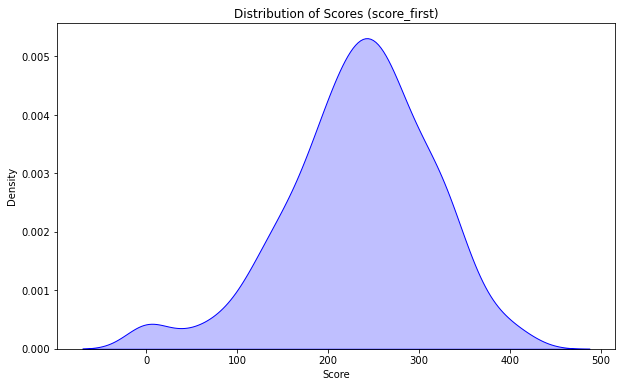

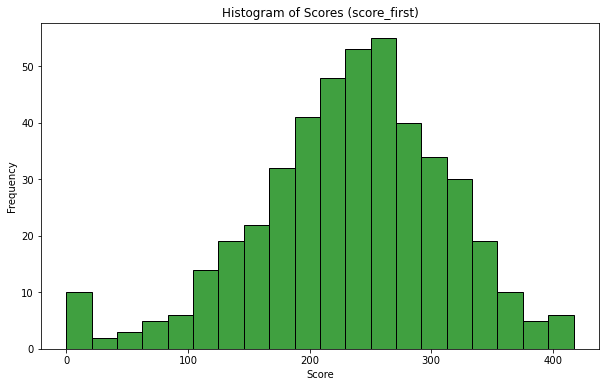

In [77]:
scores = cwc['score_first']

# Create a distribution plot (KDE plot)
plt.figure(figsize=(10, 6))
sns.kdeplot(scores, shade=True, color='blue')
plt.title('Distribution of Scores (score_first)')
plt.xlabel('Score')
plt.ylabel('Density')
plt.show()

# Create a histogram
plt.figure(figsize=(10, 6))
sns.histplot(scores, bins=20, color='green', kde=False)
plt.title('Histogram of Scores (score_first)')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.show()

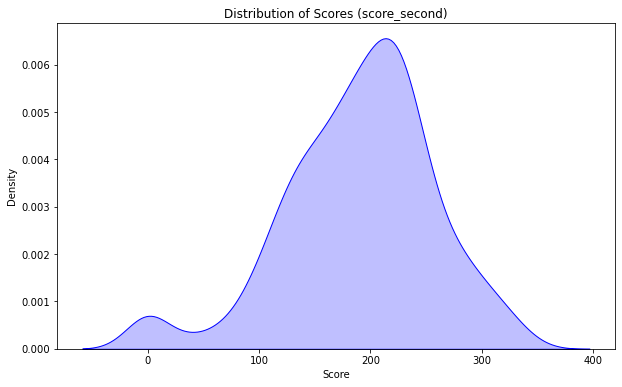

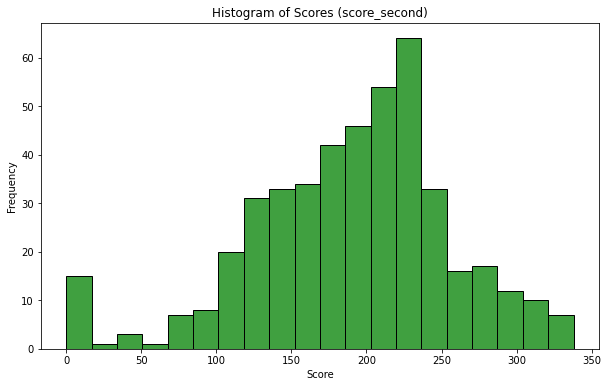

In [78]:
scores1 = cwc['score_second']

# Create a distribution plot (KDE plot)
plt.figure(figsize=(10, 6))
sns.kdeplot(scores1, shade=True, color='blue')
plt.title('Distribution of Scores (score_second)')
plt.xlabel('Score')
plt.ylabel('Density')
plt.show()

# Create a histogram
plt.figure(figsize=(10, 6))
sns.histplot(scores1, bins=20, color='green', kde=False)
plt.title('Histogram of Scores (score_second)')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.show()

In [79]:
cwc = cwc.rename(columns={'result': 'Winner'})

In [80]:
cwc.head()

,Year,bat_first,score_first,bat_second,score_second,Winner
0,1975,ENG,334,IND,132,England won by 202 runs
1,1975,NZ,309,EAS,128,New Zealand won by 181 runs
2,1975,AUS,278,PAK,205,Australia won by 73 runs
3,1975,SL,86,WI,87,West Indies won by 9 wickets (with 236 balls r...
4,1975,ENG,266,NZ,186,England won by 80 runs


In [81]:
cwc['Winner'].describe()

count           454
unique          423
top       No result
freq              8
Name: Winner, dtype: object

In [82]:
cwc['Winner'].isnull().sum()

0

In [83]:
cwc['Winner'].unique()

array(['England won by 202 runs', 'New Zealand won by 181 runs',
       'Australia won by 73 runs',
       'West Indies won by 9 wickets (with 236 balls remaining)',
       'England won by 80 runs',
       'India won by 10 wickets (with 181 balls remaining)',
       'Australia won by 52 runs',
       'West Indies won by 1 wicket (with 2 balls remaining)',
       'West Indies won by 7 wickets (with 84 balls remaining)',
       'Pakistan won by 192 runs', 'England won by 196 runs',
       'New Zealand won by 4 wickets (with 7 balls remaining)',
       'Australia won by 4 wickets (with 188 balls remaining)',
       'West Indies won by 5 wickets (with 119 balls remaining)',
       'West Indies won by 17 runs',
       'West Indies won by 9 wickets (with 51 balls remaining)',
       'New Zealand won by 9 wickets (with 74 balls remaining)',
       'England won by 6 wickets (with 77 balls remaining)',
       'Pakistan won by 8 wickets (with 119 balls remaining)',
       'Match abandoned withou

In [84]:
cwc['Winner'] = cwc['Winner'].str.replace(r' won.*', '', regex=True)

cwc['Winner'].unique()

array(['England', 'New Zealand', 'Australia', 'West Indies', 'India',
       'Pakistan', 'Match abandoned without a ball bowled', 'Sri Lanka',
       'Zimbabwe', 'South Africa', 'No result', 'Kenya', 'U.A.E.',
       'Bangladesh', 'Match tied', 'Canada', 'Netherlands',
       'Match tied (D/L method)', 'Ireland', 'Afghanistan'], dtype=object)

In [85]:
cwc.head()

,Year,bat_first,score_first,bat_second,score_second,Winner
0,1975,ENG,334,IND,132,England
1,1975,NZ,309,EAS,128,New Zealand
2,1975,AUS,278,PAK,205,Australia
3,1975,SL,86,WI,87,West Indies
4,1975,ENG,266,NZ,186,England


In [90]:
cwc['Winner'].replace({
    'Match abandoned without a ball bowled': 'No result',
    'Match tied': 'Tie',
    'Match tied (D/L method)': 'Tie'
}, inplace=True)

In [103]:
cwc['Winner'].unique()

array(['Eng', 'NZ', 'Aus', 'WI', 'Ind', 'Pak', 'nan', 'SL', 'Zim', 'SA',
       'No ', 'Ken', 'U.A', 'Ban', 'Tie', 'Can', 'Net', 'Ire', 'Afg'],
      dtype=object)

In [104]:
cwc['Winner'].replace({
    'South Africa': 'SA',
    'United Arab Emirates': 'UAE',
    'U.A.E': 'UAE',
    'West Indies': 'WI',
    'New Zealand': 'NZ',
    'Sri Lanka' : 'SL'
}, inplace=True)

In [101]:
# taking the first three letters
#cwc['Winner'] = cwc['Winner'].apply(lambda x: x[:3] if len(x) > 2 else x)

In [105]:
cwc['Winner'].unique()

array(['Eng', 'NZ', 'Aus', 'WI', 'Ind', 'Pak', 'nan', 'SL', 'Zim', 'SA',
       'No ', 'Ken', 'U.A', 'Ban', 'Tie', 'Can', 'Net', 'Ire', 'Afg'],
      dtype=object)

In [106]:
cwc['Winner'].value_counts()

Aus    69
NZ     54
Ind    53
Eng    48
Pak    45
WI     43
SL     40
SA     38
Ban    14
Zim    12
No      8
Ken     7
Ire     7
nan     5
Tie     5
Can     2
Net     2
U.A     1
Afg     1
Name: Winner, dtype: int64

In [107]:
cwc['Winner'].replace({
    'No' : 'No Result',
    'U.A' : 'UAE'
}, inplace=True)

In [108]:
cwc['Winner'].value_counts()

Aus    69
NZ     54
Ind    53
Eng    48
Pak    45
WI     43
SL     40
SA     38
Ban    14
Zim    12
No      8
Ken     7
Ire     7
nan     5
Tie     5
Can     2
Net     2
UAE     1
Afg     1
Name: Winner, dtype: int64

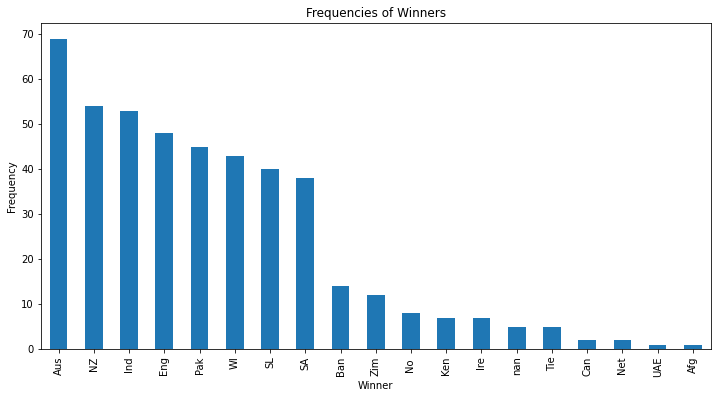

In [109]:
winner_frequency = cwc['Winner'].value_counts()

# Create a bar chart
plt.figure(figsize=(12, 6))  # Adjust the figure size if needed
winner_frequency.plot(kind='bar')
plt.title('Frequencies of Winners')
plt.xlabel('Winner')
plt.ylabel('Frequency')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability

# Show the bar chart
plt.show()

In [110]:
cwc.columns

Index(['Year', 'bat_first', 'score_first', 'bat_second', 'score_second',
       'Winner'],
      dtype='object')

# Model Selection & Prediction

In [114]:
from sklearn.model_selection import train_test_split

In [115]:
X = cwc[['Year', 'bat_first', 'score_first', 'bat_second', 'score_second']]
y = cwc['Winner']

In [116]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [117]:
X_train.to_csv('train.csv', index=False)
y_train.to_csv('train_labels.csv', index=False)

X_test.to_csv('test.csv', index=False)
y_test.to_csv('test_labels.csv', index=False)

In [118]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Load the data
X_train = pd.read_csv('train.csv')
y_train = pd.read_csv('train_labels.csv')
X_test = pd.read_csv('test.csv')
y_test = pd.read_csv('test_labels.csv')

# Logistic Regression
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)
logistic_predictions = logistic_model.predict(X_test)
logistic_accuracy = accuracy_score(y_test, logistic_predictions)

# Decision Tree
decision_tree_model = DecisionTreeClassifier()
decision_tree_model.fit(X_train, y_train)
decision_tree_predictions = decision_tree_model.predict(X_test)
decision_tree_accuracy = accuracy_score(y_test, decision_tree_predictions)

#accuracy of both models
print("Logistic Regression Accuracy:", logistic_accuracy)
print("Decision Tree Accuracy:", decision_tree_accuracy)

#classification reports for more detailed metrics
print("Logistic Regression Classification Report:\n", classification_report(y_test, logistic_predictions))
print("Decision Tree Classification Report:\n", classification_report(y_test, decision_tree_predictions))


ValueError: could not convert string to float: 'SL'